In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import mat73

In [3]:
# mat_data = h5py.File('indy_20160407_02.mat', 'r')
mat_data = mat73.loadmat('indy_20160627_01.mat')

In [4]:
print(mat_data.keys())

dict_keys(['chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf'])


In [5]:
print(len(mat_data['chan_names']))

96


In [6]:
print(len(mat_data['t']))

840737


In [7]:
spikes_times = []

time = -1
for i in range(96):
    spike_time = mat_data['spikes'][i][0]
    if spike_time is not None:
        temp = np.argmax(spike_time)
        time = max(time, temp)
    spikes_times.append(spike_time)

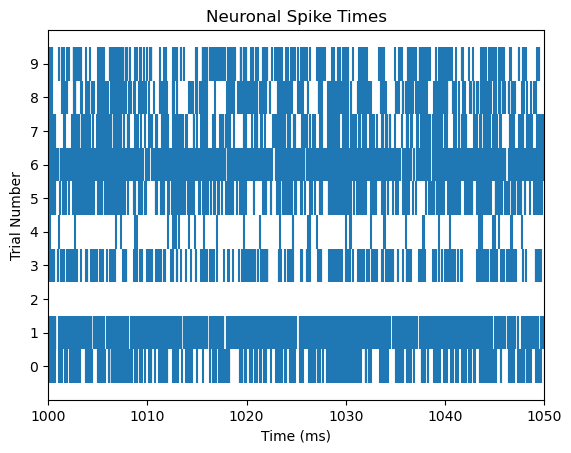

In [11]:
fig, ax = plt.subplots()

# Loop to plot raster for each trial
# for trial in range(len(ten_spike_trains)):
#     spike_times = [i for i, x in enumerate(ten_spike_trains[trial]) if x == spike_value]
#     ax.vlines(spike_times, trial - 0.5, trial + 0.5)

for i in range(10):
    ax.vlines(spikes_times[i], i - 0.5, i + 0.5)

ax.set_xlim([1000, 1050])
ax.set_xlabel('Time (ms)')

# specify tick marks and label label y axis
ax.set_yticks(range(10))
ax.set_ylabel('Trial Number')

ax.set_title('Neuronal Spike Times') 

# add shading for stimulus duration)
# ax.axvspan(light_onset_time, light_offset_time, alpha=0.5, color='greenyellow')

plt.show()

In [9]:
# 提取数据
spikes = mat_data['spikes']
num_neurons = len(spikes)
trial_duration = mat_data['t'][-1]
num_trials = len(spikes[0][0])